In [ ]:
!pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xarray as xr
import numpy as np
import pymannkendall as mk
import pandas as pd
import matplotlib.pyplot as plt

#import data
#apcsa_gender = pd.read_csv('APCSA.csv')
#column_names = ['Year','M','F','MFR']
#url_a_p = 'https://raw.githubusercontent.com/Dr-Kaya/APCSGender/45dfea8d4d4e714673cfe5213159dce0a9d6ddd1/APCSA.csv'
#url_ab_p = 'https://raw.githubusercontent.com/Dr-Kaya/APCSGender/main/APCSABParticipation.csv'
#url_p_p = 'https://raw.githubusercontent.com/Dr-Kaya/APCSGender/main/APCSPParticipation.csv'
#url_all_p = 'https://raw.githubusercontent.com/Dr-Kaya/APCSGender/main/AllAPCSParticipation.csv'
#url_all_ap_p = 'https://raw.githubusercontent.com/Dr-Kaya/APCSGender/main/ALLAP.csv'
#apcsa_gender = pd.read_csv(url_a_p)

In [ ]:
#import dataset
df = pd.read_csv("tapar.csv")

In [ ]:
#import data
#from google.colab import files
#uploaded = files.upload()

Saving participation.csv to participation (7).csv


In [ ]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['participation.csv']))
# Dataset is now stored in a Pandas Dataframe
#data = pd.read_excel(uploaded)

In [ ]:
df.tail()

,Exams,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# transpose the DataFrame
#df1 = df.transpose()
df2=df.T
header=df2.iloc[0]
df2=df2[1:]
df2.columns=header
# reset the index and move it to a new column
df2.reset_index(inplace=True)
df2.rename(columns={'index': 'Year'}, inplace=True)
# display the transposed DataFrame
df2.head()

Exams,Year,PHYSICS 1,INTL. ENGLISH LANGUAGE,PHYSICS B,CHEMISTRY,ENVIRONMENTAL SCI,STATISTICS,ECONOMICS - MICRO,STUDIO ART - 3D DESIGN,ECONOMICS - MACRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1997,NaN,1.003,2.341,1.718,NaN,2.364,1.779,NaN,1.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,NaN,2.614,2.402,1.717,2.034,1.974,1.536,NaN,1.762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999,NaN,1.223,2.044,1.637,1.777,2.045,1.583,NaN,1.614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,NaN,3.459,2.039,1.582,1.748,2.036,1.694,NaN,1.539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,NaN,2.023,2.245,1.713,1.835,1.762,1.423,NaN,1.638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.tail()

Exams,Year,PHYSICS 1,INTL. ENGLISH LANGUAGE,PHYSICS B,CHEMISTRY,ENVIRONMENTAL SCI,STATISTICS,ECONOMICS - MICRO,STUDIO ART - 3D DESIGN,ECONOMICS - MACRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2017,3.15,NaN,NaN,1.921,1.592,1.589,1.585,1.587,1.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2018,2.667,NaN,NaN,1.871,1.583,1.626,1.601,1.639,1.462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2019,2.581,NaN,NaN,1.873,1.403,1.501,1.616,1.72,1.465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2020,1.502,NaN,NaN,1.586,1.195,1.119,1.462,1.605,1.408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Average,2.66,2.11,1.953,1.782,1.691,1.688,1.682,1.657,1.636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# find the index of the last row
last_row_index = df2.index[-1]
print('Index of last row:', last_row_index)

# drop the last row - average row
df2.drop(index=last_row_index, inplace=True)
df2.tail()

Index of last row: 24


Exams,Year,PHYSICS 1,INTL. ENGLISH LANGUAGE,PHYSICS B,CHEMISTRY,ENVIRONMENTAL SCI,STATISTICS,ECONOMICS - MICRO,STUDIO ART - 3D DESIGN,ECONOMICS - MACRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2016,3.008,NaN,NaN,1.986,1.681,1.526,1.639,1.814,1.491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2017,3.15,NaN,NaN,1.921,1.592,1.589,1.585,1.587,1.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2018,2.667,NaN,NaN,1.871,1.583,1.626,1.601,1.639,1.462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2019,2.581,NaN,NaN,1.873,1.403,1.501,1.616,1.72,1.465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2020,1.502,NaN,NaN,1.586,1.195,1.119,1.462,1.605,1.408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# increase the number of columns displayed in the output
pd.set_option('display.max_columns', 48)
#column names
print(df2.columns)

Index([                  'Year',              'PHYSICS 1',
       'INTL. ENGLISH LANGUAGE',              'PHYSICS B',
                    'CHEMISTRY',      'ENVIRONMENTAL SCI',
                   'STATISTICS',      'ECONOMICS - MICRO',
       'STUDIO ART - 3D DESIGN',      'ECONOMICS - MACRO',
       ...
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan,
                            nan,                      nan],
      dtype='object', name='Exams', length=999)


In [ ]:
# iterate over the columns
for i, col in enumerate(df2.columns):
  # print the column title and index number
  print(f'Column {i+1}: {col}')

Column 1: Year
Column 2: PHYSICS 1
Column 3: INTL. ENGLISH LANGUAGE
Column 4: PHYSICS B
Column 5: CHEMISTRY
Column 6: ENVIRONMENTAL SCI
Column 7: STATISTICS
Column 8: ECONOMICS - MICRO
Column 9: STUDIO ART - 3D DESIGN
Column 10: ECONOMICS - MACRO
Column 11: PHYSICS 2
Column 12: PHYSICS C - MECH
Column 13: BIOLOGY
Column 14: WORLD HISTORY
Column 15: PHYSICS C - E&M
Column 16: HUMAN GEOGRAPHY
Column 17: GOVT&POL - U.S.
Column 18: CALCULUS AB
Column 19: EUROPEAN HIST
Column 20: GOVT&POL - COMP
Column 21: COMP SCI-A
Column 22: MUSIC THEORY
Column 23: U.S. HISTORY
Column 24: CALCULUS BC
Column 25: ENG LANG/COMP
Column 26: COMP SCI-AB
Column 27: FRENCH LANG
Column 28: ART - GENERAL
Column 29: ITALIAN LANG
Column 30: LATIN - VERGIL
Column 31: STUDIO ART - 2D DESIGN
Column 32: COMPUTER SCIENCE PRINCIPLES
Column 33: PSYCHOLOGY
Column 34: ART - DRAWING
Column 35: JAPANESE LANG & CULTURE
Column 36: ENG LIT/COMP
Column 37: LATIN - LITERATURE**
Column 38: RESEARCH
Column 39: ART HISTORY
Column 40: 

In [ ]:
# select only the first 47 columns
# get a list of all column names
columns = df2.columns
df2 = df2[columns[:46]]
#column names
print(df2.columns)

Index(['Year', 'PHYSICS 1', 'INTL. ENGLISH LANGUAGE', 'PHYSICS B', 'CHEMISTRY',
       'ENVIRONMENTAL SCI', 'STATISTICS', 'ECONOMICS - MICRO',
       'STUDIO ART - 3D DESIGN', 'ECONOMICS - MACRO', 'PHYSICS 2',
       'PHYSICS C - MECH', 'BIOLOGY', 'WORLD HISTORY', 'PHYSICS C - E&M',
       'HUMAN GEOGRAPHY', 'GOVT&POL - U.S.', 'CALCULUS AB', 'EUROPEAN HIST',
       'GOVT&POL - COMP', 'COMP SCI-A', 'MUSIC THEORY', 'U.S. HISTORY',
       'CALCULUS BC', 'ENG LANG/COMP', 'COMP SCI-AB', 'FRENCH LANG',
       'ART - GENERAL', 'ITALIAN LANG', 'LATIN - VERGIL',
       'STUDIO ART - 2D DESIGN', 'COMPUTER SCIENCE PRINCIPLES', 'PSYCHOLOGY',
       'ART - DRAWING', 'JAPANESE LANG & CULTURE', 'ENG LIT/COMP',
       'LATIN - LITERATURE**', 'RESEARCH', 'ART HISTORY',
       'CHINESE LANGUAGE & CULTURE', 'SPANISH LANG', 'SEMINAR', 'SPANISH LIT',
       'FRENCH LIT', 'STUDIO ART - DRAWING', 'GERMAN LANG'],
      dtype='object', name='Exams')


In [ ]:
# display the data types of each column
print(df2.dtypes)

Exams
Year                           object
PHYSICS 1                      object
INTL. ENGLISH LANGUAGE         object
PHYSICS B                      object
CHEMISTRY                      object
ENVIRONMENTAL SCI              object
STATISTICS                     object
ECONOMICS - MICRO              object
STUDIO ART - 3D DESIGN         object
ECONOMICS - MACRO              object
PHYSICS 2                      object
PHYSICS C - MECH               object
BIOLOGY                        object
WORLD HISTORY                  object
PHYSICS C - E&M                object
HUMAN GEOGRAPHY                object
GOVT&POL - U.S.                object
CALCULUS AB                    object
EUROPEAN HIST                  object
GOVT&POL - COMP                object
COMP SCI-A                     object
MUSIC THEORY                   object
U.S. HISTORY                   object
CALCULUS BC                    object
ENG LANG/COMP                  object
COMP SCI-AB                    object
FRENCH

In [ ]:
# convert the data type of all columns to numeric
df3 = df2.apply(pd.to_numeric)
# display the data types of each column
print(df3.dtypes)

Exams
Year                             int64
PHYSICS 1                      float64
INTL. ENGLISH LANGUAGE         float64
PHYSICS B                      float64
CHEMISTRY                      float64
ENVIRONMENTAL SCI              float64
STATISTICS                     float64
ECONOMICS - MICRO              float64
STUDIO ART - 3D DESIGN         float64
ECONOMICS - MACRO              float64
PHYSICS 2                      float64
PHYSICS C - MECH               float64
BIOLOGY                        float64
WORLD HISTORY                  float64
PHYSICS C - E&M                float64
HUMAN GEOGRAPHY                float64
GOVT&POL - U.S.                float64
CALCULUS AB                    float64
EUROPEAN HIST                  float64
GOVT&POL - COMP                float64
COMP SCI-A                     float64
MUSIC THEORY                   float64
U.S. HISTORY                   float64
CALCULUS BC                    float64
ENG LANG/COMP                  float64
COMP SCI-AB        

In [ ]:
# fill the NaN values with None
df3.head(5)

Exams,Year,PHYSICS 1,INTL. ENGLISH LANGUAGE,PHYSICS B,CHEMISTRY,ENVIRONMENTAL SCI,STATISTICS,ECONOMICS - MICRO,STUDIO ART - 3D DESIGN,ECONOMICS - MACRO,PHYSICS 2,PHYSICS C - MECH,BIOLOGY,WORLD HISTORY,PHYSICS C - E&M,HUMAN GEOGRAPHY,GOVT&POL - U.S.,CALCULUS AB,EUROPEAN HIST,GOVT&POL - COMP,COMP SCI-A,MUSIC THEORY,U.S. HISTORY,CALCULUS BC,ENG LANG/COMP,COMP SCI-AB,FRENCH LANG,ART - GENERAL,ITALIAN LANG,LATIN - VERGIL,STUDIO ART - 2D DESIGN,COMPUTER SCIENCE PRINCIPLES,PSYCHOLOGY,ART - DRAWING,JAPANESE LANG & CULTURE,ENG LIT/COMP,LATIN - LITERATURE**,RESEARCH,ART HISTORY,CHINESE LANGUAGE & CULTURE,SPANISH LANG,SEMINAR,SPANISH LIT,FRENCH LIT,STUDIO ART - DRAWING,GERMAN LANG
0,1997,NaN,1.003,2.341,1.718,NaN,2.364,1.779,NaN,1.665,NaN,1.739,1.498,NaN,1.623,NaN,1.599,1.514,1.383,1.251,1.515,1.228,1.263,1.351,1.080,1.298,1.158,1.244,NaN,1.026,NaN,NaN,1.073,0.899,NaN,0.962,0.745,NaN,0.975,NaN,0.818,NaN,0.824,0.736,NaN,0.795
1,1998,NaN,2.614,2.402,1.717,2.034,1.974,1.536,NaN,1.762,NaN,1.945,1.530,NaN,1.784,NaN,1.429,1.610,1.299,1.466,1.629,0.854,1.418,1.388,1.156,1.217,1.063,1.192,NaN,1.206,NaN,NaN,1.083,1.185,NaN,0.957,0.848,NaN,0.866,NaN,0.833,NaN,0.789,0.854,NaN,1.022
2,1999,NaN,1.223,2.044,1.637,1.777,2.045,1.583,NaN,1.614,NaN,1.860,1.481,NaN,1.618,NaN,1.488,1.471,1.409,1.642,1.604,1.415,1.400,1.395,1.221,1.496,1.179,1.121,NaN,0.838,NaN,NaN,0.688,1.150,NaN,0.954,0.901,NaN,0.842,NaN,0.821,NaN,0.679,0.731,NaN,0.830
3,2000,NaN,3.459,2.039,1.582,1.748,2.036,1.694,NaN,1.539,NaN,1.704,1.491,NaN,1.247,NaN,1.684,1.490,1.388,1.323,1.685,1.205,1.308,1.297,1.163,1.172,1.213,1.167,NaN,0.900,NaN,NaN,1.137,0.894,NaN,1.135,0.948,NaN,0.742,NaN,0.855,NaN,0.959,0.887,NaN,0.866
4,2001,NaN,2.023,2.245,1.713,1.835,1.762,1.423,NaN,1.638,NaN,1.897,1.503,NaN,1.420,1.677,1.623,1.622,1.455,1.269,1.656,1.358,1.493,1.366,1.145,1.156,1.247,1.025,NaN,0.884,NaN,NaN,1.106,0.884,NaN,0.982,1.001,NaN,0.932,NaN,0.855,NaN,0.921,0.740,NaN,0.940


In [ ]:
# access the year(exam) column (i.e. column number 1)
# print the index values
print('Index (year) values:', df3.index.values)

Index (year) values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
# access the YEAR column (i.e. column number 0)
column_0 = df3.iloc[:, 0]
print('Year column:', df3.columns[0])
print(column_0)

Year column: Year
0     1997
1     1998
2     1999
3     2000
4     2001
5     2002
6     2003
7     2004
8     2005
9     2006
10    2007
11    2008
12    2009
13    2010
14    2011
15    2012
16    2013
17    2014
18    2015
19    2016
20    2017
21    2018
22    2019
23    2020
Name: Year, dtype: int64


In [ ]:
# access the PHYSICS column (i.e. column number 1)
column_0 = df3.iloc[:, 1]
print('Year column:', df3.columns[1])
print(column_0)



Year column: PHYSICS 1
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18    3.050
19    3.008
20    3.150
21    2.667
22    2.581
23    1.502
Name: PHYSICS 1, dtype: float64


In [ ]:
# access the GERMAN LANG column (i.e. column number 1)
column_2 = df3.iloc[:, 45]
print('Last column:', df3.columns[45])
print(column_2)

Last column: GERMAN LANG
0     0.795
1     1.022
2     0.830
3     0.866
4     0.940
5     0.966
6     0.934
7     0.774
8     0.792
9     0.818
10    0.858
11    0.740
12    0.868
13    0.756
14    0.748
15    0.763
16    0.822
17    0.846
18    0.674
19    0.826
20    0.764
21    0.792
22    0.855
23    0.798
Name: GERMAN LANG, dtype: float64


In [ ]:
#test for the art
result = mk.original_test(df3.iloc[:,2])
print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.4523703606773608, z=0.7514691493021795, Tau=0.3333333333333333, s=5.0, var_s=28.333333333333332, slope=0.2672, intercept=1.5130000000000001)


In [ ]:
#Sen's slope
print(result.slope)

0.2672


In [ ]:

def ap_test(df):
  trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(df)
  print('trend is ', trend)
  print('p is ', p)
  print("Sen's slope is", slope)
  print("z score is", z)
  print('intercept is', intercept)
  print('Tau is', Tau)
  print('s is', s)
  print('var s is', var_s)
  print('minimum is', min(df))
  a = df.mask(df==0).min().min()
  print('minimum is', a)
  b = df.mask(df==0).max().max()
  print('maximum is', b)
  print('maximum is', max(df))
  print('mean is', np.mean(df))
  print('standard deviation is', np.std(df))
  print('number of observations:', df.count())
  #calculate intercept
  #mfr value in 2020
  y = df.iat[-1]
  x = df3['Year'].iat[-1]
  b = y - slope * x
  print('intercept is', b)

In [ ]:
for i in range(1,46):
  print(i)
  print('Exam Name:', df3.columns[i])
  #Mann Kendall Test
  #result = mk.original_test(df2.iloc[:,2])
  ap_test(df3.iloc[:,i])
  #print(result)
  print('-----------------------------')
  print()


1
Exam Name: PHYSICS 1
trend is  no trend
p is  0.060289173990602185
Sen's slope is -0.1705000000000001
z score is -1.8786728732554487
intercept is 6.3327500000000025
Tau is -0.7333333333333333
s is -11.0
var s is 28.333333333333332
minimum is nan
minimum is 1.502
maximum is 3.15
maximum is nan
mean is 2.659666666666667
standard deviation is 0.5568598467198805
number of observations: 6
intercept is 345.9120000000002
-----------------------------

2
Exam Name: INTL. ENGLISH LANGUAGE
trend is  no trend
p is  0.4523703606773608
Sen's slope is 0.2672
z score is 0.7514691493021795
intercept is 1.5130000000000001
Tau is 0.3333333333333333
s is 5.0
var s is 28.333333333333332
minimum is 1.003
minimum is 1.003
maximum is 3.459
maximum is 3.459
mean is 2.1101666666666667
standard deviation is 0.831268592106199
number of observations: 6
intercept is nan
-----------------------------

3
Exam Name: PHYSICS B
trend is  decreasing
p is  0.00037014382799460677
Sen's slope is -0.0346666666666667
z sco

In [ ]:
# Create an empty list to store the output data
data = []

# Loop through the columns of the df4 DataFrame
for i in range(1, 46):
    # Get the current column name
    exam_name = df3.columns[i]

    # Perform the ap_test on the current column
    #result = ap_test(df4.iloc[:,i])
    trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(df3.iloc[:,i])

    #trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(df)
    # Extract the values from the result
    trend = trend
    p = p
    sen_slope = slope
    z_score = z
    intercept = intercept
    tau = Tau
    s = s
    var_s = var_s
    a = df3.iloc[:,i]
    #minimum = min(df3.iloc[:,i])
    #maximum = max(df3.iloc[:,i])
    minimum = a.mask(a==0).min().min()
    maximum = a.mask(a==0).max().max()
    mean = np.mean(df3.iloc[:,i])
    standard_deviation = np.std(df3.iloc[:,i])
    number_of_observations = df3.iloc[:,i].count()


    # Create a list containing the values for the current iteration
    row = [exam_name, trend, p, sen_slope, z_score, intercept, tau, s, var_s, minimum, maximum, mean, standard_deviation, number_of_observations]

    # Append the row to the data list
    data.append(row)

# Print the data list
print(data)


[['PHYSICS 1', 'no trend', 0.060289173990602185, -0.1705000000000001, -1.8786728732554487, 6.3327500000000025, -0.7333333333333333, -11.0, 28.333333333333332, 1.502, 3.15, 2.659666666666667, 0.5568598467198805, 6], ['INTL. ENGLISH LANGUAGE', 'no trend', 0.4523703606773608, 0.2672, 0.7514691493021795, 1.5130000000000001, 0.3333333333333333, 5.0, 28.333333333333332, 1.003, 3.459, 2.1101666666666667, 0.831268592106199, 6], ['PHYSICS B', 'decreasing', 0.00037014382799460677, -0.0346666666666667, -3.56050388966928, 2.247666666666667, -0.6209150326797386, -95.0, 697.0, 1.593, 2.402, 1.9533333333333336, 0.21866488820414987, 18], ['CHEMISTRY', 'increasing', 0.007952706286745492, 0.009339366515837097, 2.6540711217444977, 1.6445972850678732, 0.391304347826087, 108.0, 1625.3333333333333, 1.582, 2.085, 1.782041666666667, 0.1285675824766449, 24], ['ENVIRONMENTAL SCI', 'decreasing', 0.0021868164277665247, -0.015750000000000004, -3.0636129406591786, 1.891, -0.4624505928853755, -117.0, 1433.6666666666

In [ ]:
# Create a list of column names for the DataFrame
columns = ['Exam Name', 'Trend', 'p', "Sen's slope", 'z score', 'intercept', 'Tau', 's', 'var s', 'minimum', 'maximum', 'mean', 'standard deviation', 'number of observations']

# Create a Pandas DataFrame from the data and column names
df = pd.DataFrame(data, columns=columns)


In [ ]:
# Print the DataFrame as a table
print(df.to_string())


                      Exam Name       Trend             p  Sen's slope   z score  intercept       Tau      s        var s  minimum  maximum      mean  standard deviation  number of observations
0                     PHYSICS 1    no trend  6.028917e-02    -0.170500 -1.878673   6.332750 -0.733333  -11.0    28.333333    1.502    3.150  2.659667            0.556860                       6
1        INTL. ENGLISH LANGUAGE    no trend  4.523704e-01     0.267200  0.751469   1.513000  0.333333    5.0    28.333333    1.003    3.459  2.110167            0.831269                       6
2                     PHYSICS B  decreasing  3.701438e-04    -0.034667 -3.560504   2.247667 -0.620915  -95.0   697.000000    1.593    2.402  1.953333            0.218665                      18
3                     CHEMISTRY  increasing  7.952706e-03     0.009339  2.654071   1.644597  0.391304  108.0  1625.333333    1.582    2.085  1.782042            0.128568                      24
4             ENVIRONMENTAL SC

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('tapar_analysis.csv')

# Save the DataFrame to an Excel file
df.to_excel('tapar_analysis.xlsx')

In [ ]:
# documentation: https://pypi.org/project/pymannkendall/

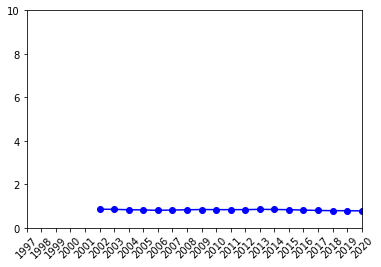

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.lineplot(data=apcsa_gender, x='Year', y= 'MFR', markers=False, dashes=False)
x = df3['Year']
y = df3['WORLD HISTORY']
#use green as color for individual points

plt.plot(x, y, '-o', color='blue')
plt.xticks(x)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
#print("slope from fit is", m)
#print("intercept from fit is", b)

#use red as color for regression line
plt.plot(x, (m*x+b), color='red')
plt.axis([1997, 2020, 0, 10])
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


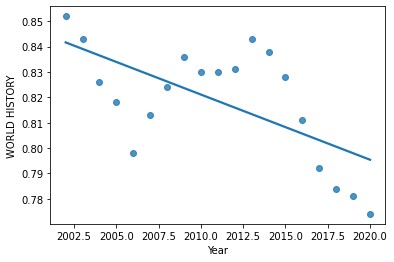

In [ ]:
#create scatterplot with regression line
sns.regplot(x, y, ci=None)